In [11]:
import numpy as np    #导入需要安装的包
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')    # 设置绘图风格
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 28, 18
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签

In [12]:
df_data = pd.read_csv(r"F:\kaidian\bra.csv",encoding='gbk')    #导入数据，读取CSV数据
df_data

,creationTime,productColor,productSize
0,2016/6/8 17:17,22咖啡色,75C
1,2017/4/7 19:34,22咖啡色,80B
2,2016/6/18 19:44,02粉色,80C
3,2017/8/3 20:39,22咖啡色,80B
4,2016/7/6 14:02,22咖啡色,75B
...,...,...,...
15492,2017/10/28 22:39,粉色,38B/85B
15493,2017/11/11 0:13,粉色套装（含内裤）,36C/80C
15494,2017/11/1 14:41,黑色,34A/75A
15495,2017/10/31 18:40,粉色,34B/75B


In [13]:
color_data = pd.read_csv(r"F:\kaidian\colors.csv",encoding='gbk')
color_data

,Unnamed: 0,0,1
0,0,22咖啡色,棕色
1,1,02粉色,粉色
2,2,071蓝色,蓝色
3,3,071黑色,黑色
4,4,071肤色,肤色
...,...,...,...
113,113,蓝色 单件,蓝色
114,114,浅紫,紫色
115,115,紫色套装（其他颜色备注）,紫色
116,116,粉色套装（含内裤）,粉色


In [14]:
df_data.info()    #查看数据属性
color_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15497 entries, 0 to 15496
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   creationTime  15497 non-null  object
 1   productColor  15496 non-null  object
 2   productSize   15496 non-null  object
dtypes: object(3)
memory usage: 363.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  118 non-null    int64 
 1   0           117 non-null    object
 2   1           117 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [15]:
df_data.head(10)    #查看前10行

,creationTime,productColor,productSize
0,2016/6/8 17:17,22咖啡色,75C
1,2017/4/7 19:34,22咖啡色,80B
2,2016/6/18 19:44,02粉色,80C
3,2017/8/3 20:39,22咖啡色,80B
4,2016/7/6 14:02,22咖啡色,75B
5,2017/3/18 11:49,22咖啡色,80B
6,2017/1/13 13:43,22咖啡色,80B
7,2016/7/10 22:22,22咖啡色,80B
8,2016/7/15 14:34,22咖啡色,80B
9,2017/3/27 12:54,22咖啡色,70C


In [16]:
df_data.tail(10)    #打印最后10行

,creationTime,productColor,productSize
15487,2017/11/6 10:52,肤色,36B/80B
15488,2017/11/15 9:54,粉色,34A/75A
15489,2017/11/14 12:31,粉色,36B/80B
15490,2017/11/17 10:30,浅紫,34B/75B
15491,2017/11/17 10:30,肤色,34B/75B
15492,2017/10/28 22:39,粉色,38B/85B
15493,2017/11/11 0:13,粉色套装（含内裤）,36C/80C
15494,2017/11/1 14:41,黑色,34A/75A
15495,2017/10/31 18:40,粉色,34B/75B
15496,2017/11/7 18:38,黑色,36A/80A


In [17]:
color_data.head(10)

,Unnamed: 0,0,1
0,0,22咖啡色,棕色
1,1,02粉色,粉色
2,2,071蓝色,蓝色
3,3,071黑色,黑色
4,4,071肤色,肤色
5,5,0993无痕肤色,肤色
6,6,0993无痕黑色,黑色
7,7,071红色,红色
8,8,0993无痕酒红色,红色
9,9,h03无痕蓝灰,蓝色


In [18]:
def clean_data(df_data, color_data):
    '''清洗颜色数据'''
    df_data = pd.merge(df_data, color_data, left_on='productColor', right_on='0')
    df_data = df_data.drop(columns=['productColor', 'Unnamed: 0', '0'])    #删除三列
    df_data = df_data.rename(columns={'1':'productColor'})    #对列名重命名
    
    '''设置尺码的正则表达式'''
    
    pattern_one = re.compile(r'[7-9]\d[A-Z]')    #将字符串转换为正则表达式对象
    pattern_two = re.compile(r'[A-Z][7-9]\d')
    for i in range(len(df_data)):
        try:
            '''清洗尺码'''
            re_data_one = pattern_one.findall(df_data['productSize'][i])
            re_data_two = pattern_two.findall(df_data['productSize'][i])
            if re_data_one:
                df_data['productSize'][i] = re_data_one[0]
            if re_data_two:
                df_data['productSize'][i] = df_data['productSize'][i][1:] + df_data['productSize'][i][0]
            if re.compile(r'\d{2}/\d{2}[A-Z]').findall(df_data['productSize'][i]):
                df_data['productSize'][i] = max(re.compile(r'\d{2}').findall(df_data['productSize'][i])) + df_data['productSize'][i][-1]
            
            else:
                continue
        except:
            continue
            
    return df_data
            

In [19]:
df_data = clean_data(df_data, color_data)
df_data.dropna(axis=0, how='any', inplace=True)    #删除带缺失值的行，直接在原数据上改
df_data.reset_index(drop=True)    #改变行索引index

,creationTime,productSize,productColor
0,2016/6/8 17:17,75C,棕色
1,2017/4/7 19:34,80B,棕色
2,2017/8/3 20:39,80B,棕色
3,2016/7/6 14:02,75B,棕色
4,2017/3/18 11:49,80B,棕色
...,...,...,...
15491,2017/11/3 16:39,75A,粉色
15492,2017/11/7 23:03,75B,粉色
15493,2017/11/14 17:25,75A,粉色
15494,2017/11/11 0:13,80C,粉色


In [20]:
df_data.head(15)

,creationTime,productSize,productColor
0,2016/6/8 17:17,75C,棕色
1,2017/4/7 19:34,80B,棕色
2,2017/8/3 20:39,80B,棕色
3,2016/7/6 14:02,75B,棕色
4,2017/3/18 11:49,80B,棕色
5,2017/1/13 13:43,80B,棕色
6,2016/7/10 22:22,80B,棕色
7,2016/7/15 14:34,80B,棕色
8,2017/3/27 12:54,70C,棕色
9,2016/6/19 10:38,80C,棕色


In [21]:
color_info = df_data['productColor'].value_counts(ascending=True)    #升序排序计数

In [22]:
color = color_info.keys()    #返回字典所有的键
color_count = color_info.values    #返回字典所有的值

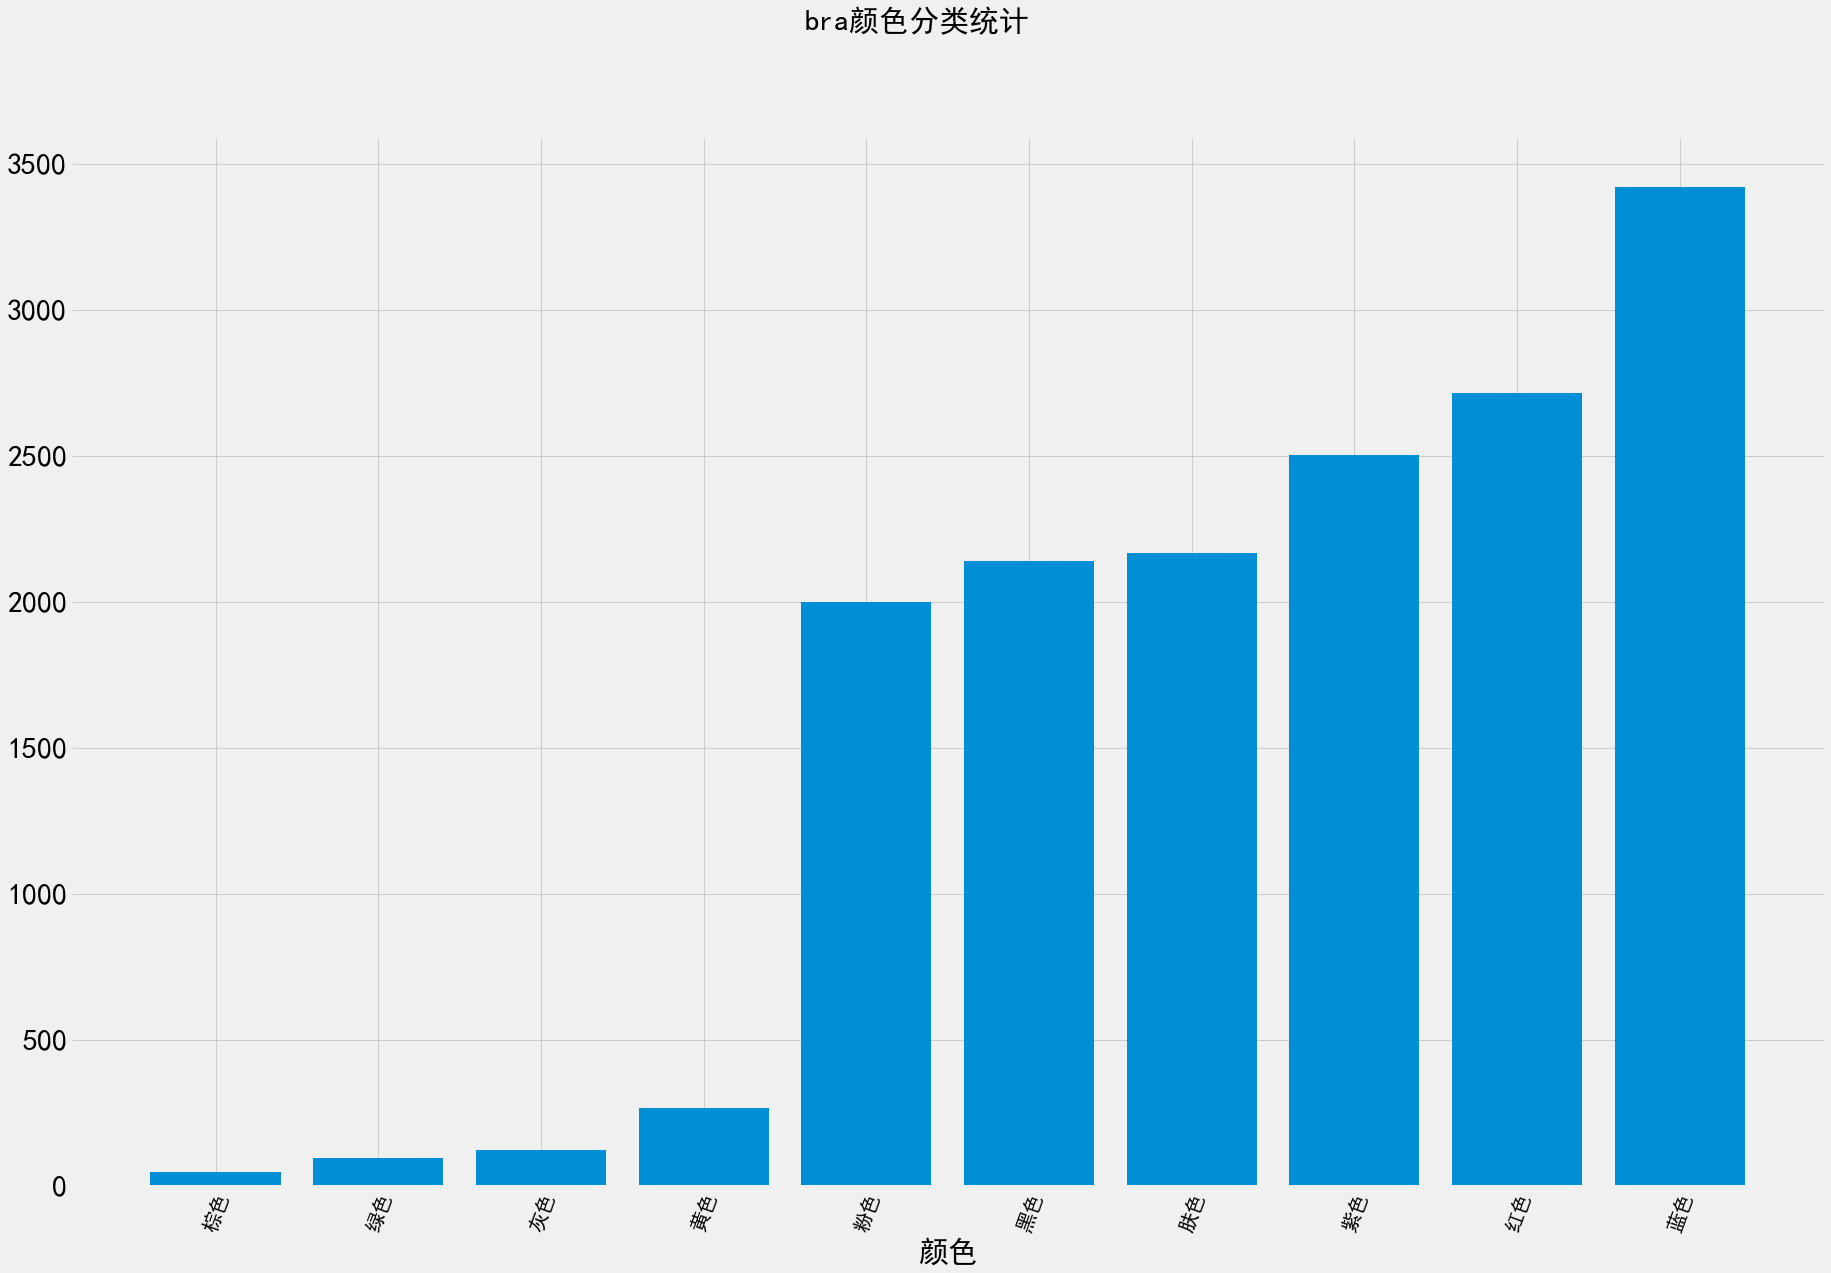

In [29]:
fig, ax = plt.subplots()
x_label = color
x_tick = np.arange(len(color))    #返回一个有终点和起点的固定步长的排列
plt.bar(x_tick, color_count, align = 'center')
fig.suptitle(u"bra颜色分类统计", fontsize= 30)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 30)
plt.xlabel('颜色', fontsize = 30)
plt.show()

In [30]:
size_info = df_data['productSize'].value_counts(ascending=True)
size = size_info.keys()
size_count = size_info.values

In [31]:
size_info

38/85ab中厚2cm        1
34/75c薄款0.8cm       1
95E                 1
90E                 3
90A                 4
95C                 4
95D                 4
75E                 5
80E                 8
85E                17
80D                18
90B                20
85D                20
90D                21
70C                27
90C                39
34/75ab中厚2cm       64
170/82/XL          75
85A                99
160/70/M          113
165/76/L          152
70A               171
85C               259
80A               270
75C               356
75D               360
75A               424
70B               459
80C               581
85B               998
80B              3968
75B              6954
Name: productSize, dtype: int64

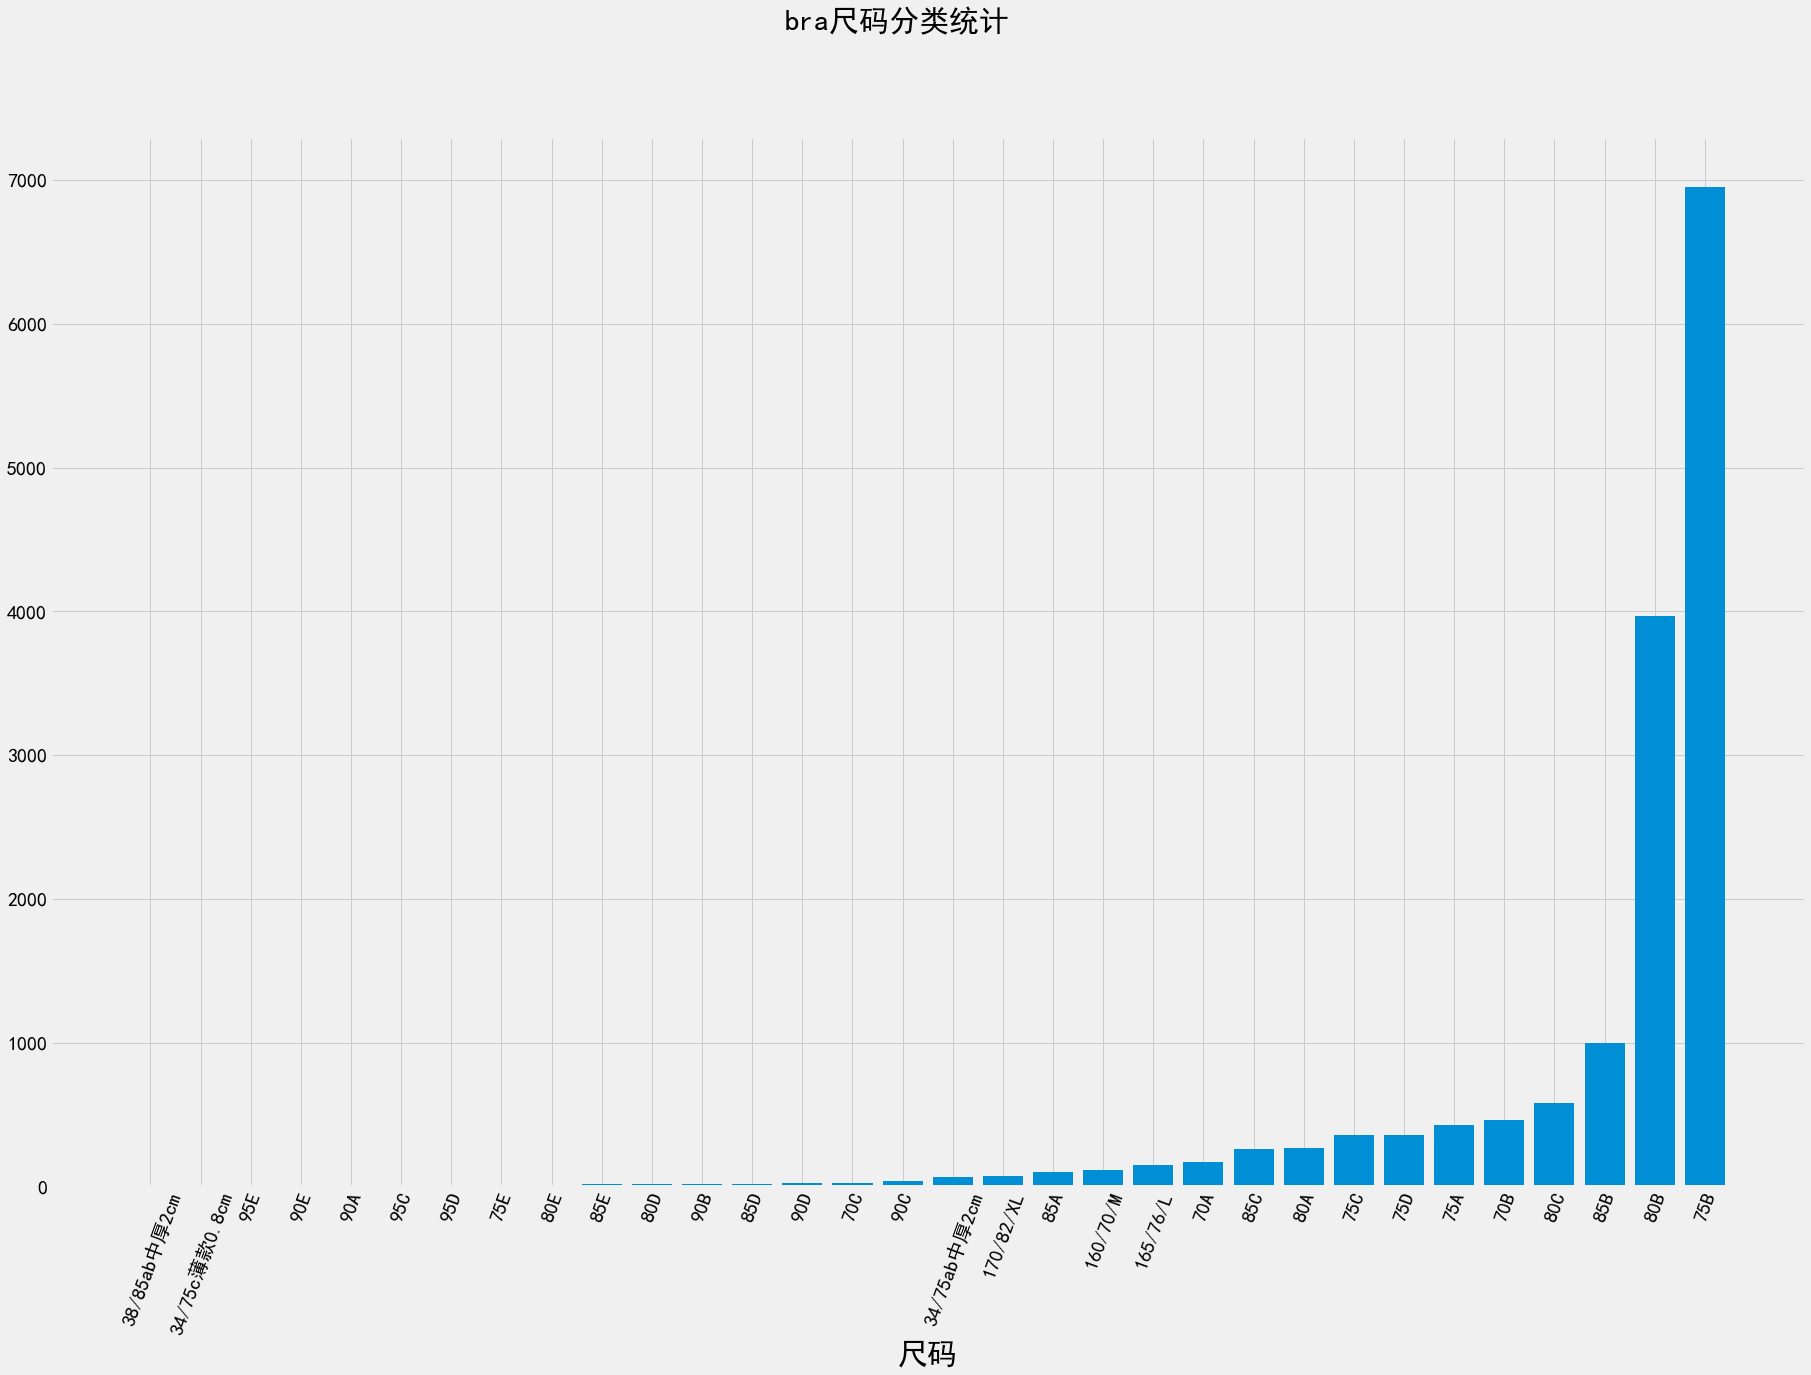

In [33]:
fig, ax = plt.subplots()
x_label = size
x_tick = np.arange(len(size))
plt.bar(x_tick, size_count, align = 'center')
fig.suptitle(u"bra尺码分类统计", fontsize= 30)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('尺码', fontsize = 30)
plt.show()